In [1]:
pip install spotipy

Se instala el modulo de spotipy, el cual contiene distintas funciones para consumir datos de la api de spotify.

In [2]:
import pandas as pd
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [3]:
id = '7b5c6d7790b34e6981532bcfbeff20a1'
secret = 'c1877373486a4959a024d4fdbee334ef'
playlistId = '4TsdcoJDYZgiip4G3YcAXe'

client_credentials_manager = SpotifyClientCredentials(client_id=id,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Se declaran variables con el id del cliente (id), la llave secreta para acceder a la api (secret) y el id de la playlist de la cual se extraera la informacion.

In [4]:
def get_track_data(track):
    track_for_dataset = {'name': track['name'], 'album': track['album']['name'],
                    'artist': track['album']['artists'][0]['name'],
                     'number_tracks_album': track['album']['total_tracks'],
                    'duration_in_mins': track['duration_ms'], 
                     'popularity': track['popularity'], 'track_number': track['track_number'],
                    'explicit' : track['explicit'],
                    'release_date': track['album']['release_date']}
    return track_for_dataset

Se crea una funcion la cual recivira un objeto con distintos datos para despues devolver otro objeto unicamente con los datos necesarios.

In [5]:
number_of_songs= 600

# Se declara el numero de canciones que se guardaran

songs_list = [] 

# Se crea un array (songs_list) el cual contiene todas canciones con la informacion completa

for i in range(int(number_of_songs/100)):
    playlist = sp.playlist_items(playlistId, offset=i*100)
    for item in playlist['items']:
        songs_list.append(item['track'])
# Se genera un loop en el cual se buscan y guardan agrupaciones de 100 canciones porque el modulo de spotipy no permite mas
    
tracks_analizis = []

for i in range(len(songs_list)):
    track = get_track_data(songs_list[i])
    tracks_analizis.append(track)
    
# Se crea otro array en el cual se guardan de nuevo las canciones pero filtradas para solo tener la informacion relevante

In [6]:
df =  pd.DataFrame(tracks_analizis)
df['artist'] = df['artist'].astype(str)
df['album'] = df['album'].astype(str)
df
# Se crea un dataframe con el array de los datos filtrados (tracks_analizis)

,name,album,artist,number_tracks_album,duration_in_mins,popularity,track_number,explicit,release_date
0,Press Start,Press Start,MDK,1,209771,0,1,False,2015-08-26
1,The Sky Is A Neighborhood,Concrete and Gold,Foo Fighters,11,244573,65,4,False,2017-09-15
2,Everlong,The Colour And The Shape,Foo Fighters,14,250546,86,11,False,1997-05-20
3,The Pretender,"Echoes, Silence, Patience & Grace",Foo Fighters,12,269373,81,1,False,2007-09-25
4,Best of You,In Your Honor,Foo Fighters,20,255626,79,3,False,2005-06-14
...,...,...,...,...,...,...,...,...,...
595,Less Than Zero,Dawn FM,The Weeknd,16,211814,80,15,False,2022-01-06
596,Sidewalks,Starboy,The Weeknd,18,231360,75,9,True,2016-11-25
597,Six Feet Under,Starboy,The Weeknd,18,237573,70,10,True,2016-11-25
598,Ordinary Life,Starboy,The Weeknd,18,221920,66,14,False,2016-11-25


In [7]:
# Se pasa la duracion de las canciones de milisegundos a minutos

def minuts(x):
    return round((x * 0.001) / 60.0, 2)

df['duration_in_mins'] = df['duration_in_mins'].apply(minuts)

df.head()

,name,album,artist,number_tracks_album,duration_in_mins,popularity,track_number,explicit,release_date
0,Press Start,Press Start,MDK,1,3.50,0,1,False,2015-08-26
1,The Sky Is A Neighborhood,Concrete and Gold,Foo Fighters,11,4.08,65,4,False,2017-09-15
2,Everlong,The Colour And The Shape,Foo Fighters,14,4.18,86,11,False,1997-05-20
3,The Pretender,"Echoes, Silence, Patience & Grace",Foo Fighters,12,4.49,81,1,False,2007-09-25
4,Best of You,In Your Honor,Foo Fighters,20,4.26,79,3,False,2005-06-14


In [8]:
df.describe()

,number_tracks_album,duration_in_mins,popularity,track_number
count,600.000000,600.000000,600.000000,600.000000
mean,12.990000,4.277683,48.940000,5.220000
std,7.885654,1.518252,26.088966,4.237711
min,1.000000,0.550000,0.000000,1.000000
25%,10.000000,3.440000,35.000000,2.000000
50%,12.000000,4.005000,54.000000,4.000000
75%,15.000000,4.732500,68.250000,8.000000
max,68.000000,16.800000,93.000000,40.000000


In [9]:
print('Valores nulos:\n',df.isnull().sum()/df.shape[0]*100)

print("Canciones repetidas antes de procesarlas: ")
print(any(list(df.duplicated())))
df = df.drop_duplicates()
print("Canciones repetidas despues de procesarlas: ")
print(any(list(df.duplicated())))

Valores nulos:
 name                   0.0
album                  0.0
artist                 0.0
number_tracks_album    0.0
duration_in_mins       0.0
popularity             0.0
track_number           0.0
explicit               0.0
release_date           0.0
dtype: float64
Canciones repetidas antes de procesarlas: 
True
Canciones repetidas despues de procesarlas: 
False


 Se ve que no hay valores nulos y se ve que en el dataframe hay un valor repetido, lo que significa que el usuario agrego mas de una ves una cancion. Asi que se eliminaran las canciones repetidas.

In [10]:
# Se remplasa los valores objetivos por numericos
df['explicit'].replace({False: 0, True: 1}, inplace=True)
df

C:\Users\simon\AppData\Local\Temp\ipykernel_16248\1401086237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'].replace({False: 0, True: 1}, inplace=True)


,name,album,artist,number_tracks_album,duration_in_mins,popularity,track_number,explicit,release_date
0,Press Start,Press Start,MDK,1,3.50,0,1,0,2015-08-26
1,The Sky Is A Neighborhood,Concrete and Gold,Foo Fighters,11,4.08,65,4,0,2017-09-15
2,Everlong,The Colour And The Shape,Foo Fighters,14,4.18,86,11,0,1997-05-20
3,The Pretender,"Echoes, Silence, Patience & Grace",Foo Fighters,12,4.49,81,1,0,2007-09-25
4,Best of You,In Your Honor,Foo Fighters,20,4.26,79,3,0,2005-06-14
...,...,...,...,...,...,...,...,...,...
595,Less Than Zero,Dawn FM,The Weeknd,16,3.53,80,15,0,2022-01-06
596,Sidewalks,Starboy,The Weeknd,18,3.86,75,9,1,2016-11-25
597,Six Feet Under,Starboy,The Weeknd,18,3.96,70,10,1,2016-11-25
598,Ordinary Life,Starboy,The Weeknd,18,3.70,66,14,0,2016-11-25


In [11]:
# Se decodifican las columnas categoricas para poder ser usadas en el modelo
df_oh = pd.get_dummies(data=df, columns=["artist", "album"], prefix=["artist", "album"])
df_oh.describe

<bound method NDFrame.describe of                           name  number_tracks_album  duration_in_mins  \
0                  Press Start                    1              3.50   
1    The Sky Is A Neighborhood                   11              4.08   
2                     Everlong                   14              4.18   
3                The Pretender                   12              4.49   
4                  Best of You                   20              4.26   
..                         ...                  ...               ...   
595             Less Than Zero                   16              3.53   
596                  Sidewalks                   18              3.86   
597             Six Feet Under                   18              3.96   
598              Ordinary Life                   18              3.70   
599        Nothing Without You                   18              3.31   

     popularity  track_number  explicit release_date  artist_10 Years  \
0             0 

In [12]:
# Dataset unicamente con datos para entrenamiento
df_fil = df_oh.drop(['name', 'release_date'], axis=1)
df_fil.head()

,number_tracks_album,duration_in_mins,popularity,track_number,explicit,artist_10 Years,artist_A Perfect Circle,artist_AC/DC,artist_ALI,artist_Alan Walker,...,album_Xenogenesis,album_You Are We,album_Youthanasia (Expanded Edition - Remastered),album_Zeit,album_Zeus,album_mau5ville: Level 1,album_mau5ville: Level 2,album_the WORLD/アルミナ,album_¡UNO!,album_Ænima
0,1,3.50,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,4.08,65,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,4.18,86,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,4.49,81,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,4.26,79,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='explicit', ylabel='popularity'>

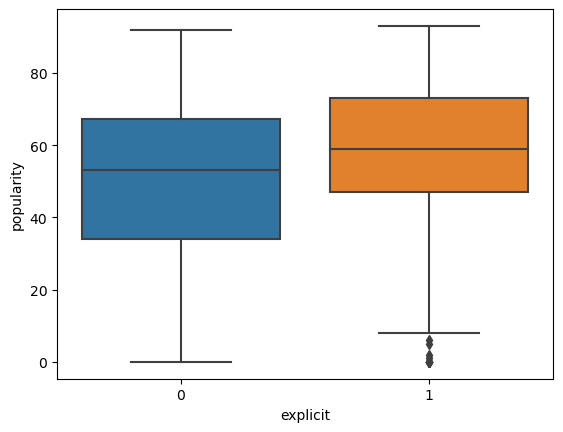

In [13]:
sns.boxplot(data=df, x="explicit", y="popularity")

La grafica anterior muestra como en promedio las canciones las cuales son explicitas tienden a ser mas populares, siendo entonces la popularidad un factor a tener encuenta si se quiere encontrar si una cancion es explicita.

<Axes: xlabel='duration_in_mins'>

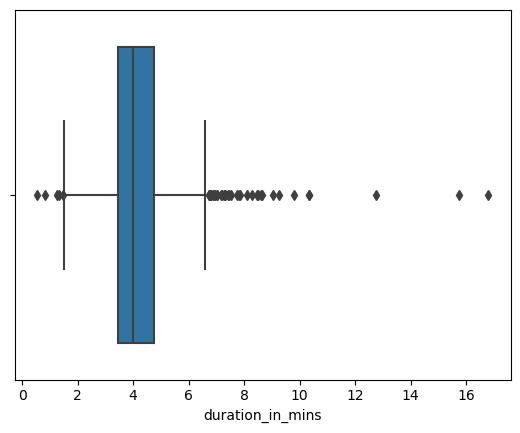

In [14]:
sns.boxplot(x=df["duration_in_mins"])

In [15]:
df[df['duration_in_mins'] >= 10]

,name,album,artist,number_tracks_album,duration_in_mins,popularity,track_number,explicit,release_date
205,All parts mixed 1,Smash Hit (Original Soundtrack),Douglas Holmquist,22,16.80,19,15,0,2014-03-15
242,Fear Inoculum,Fear Inoculum,TOOL,1,10.35,0,1,0,2019-08-07
252,Fear Inoculum,Fear Inoculum,TOOL,10,10.34,61,1,0,2019-08-30
253,Invincible,Fear Inoculum,TOOL,10,12.74,61,4,0,2019-08-30
254,7empest,Fear Inoculum,TOOL,10,15.73,58,9,1,2019-08-30


In [16]:
df_fil = df_fil[df_fil['duration_in_mins'] < 10]

La grafica anterior muestra con comunmente las canciones tienen una duracion de entre 2 y 6 minutos, pero existen varios outliars que llegan a durar mas de 16 minutos, lo cual llega a afectar la media, pero como parece ser, no de forma sustancial. Por lo tanto se eliminaron los datos que posean una duracion mayot a 10 minutos, 5 canciones.

C:\Users\simon\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


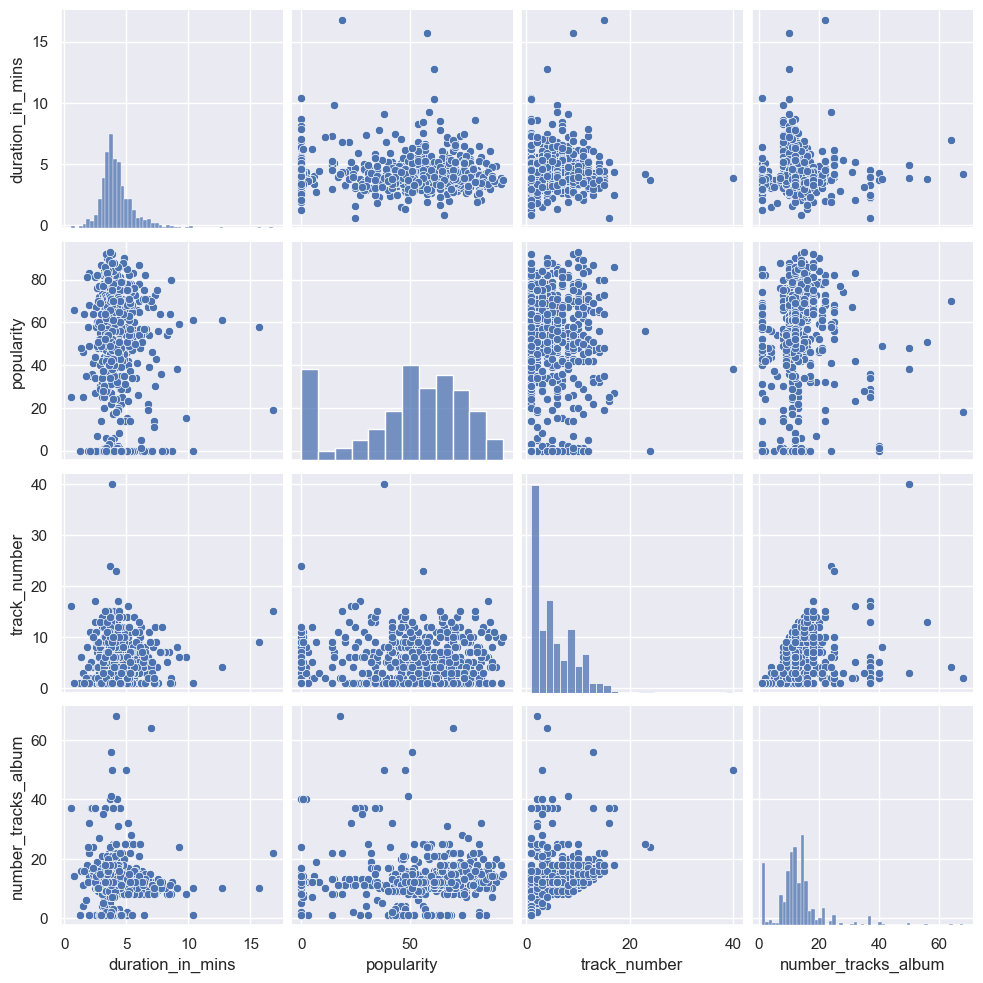

In [17]:
sns.set()
cols = ['duration_in_mins', 'popularity', 'track_number', 'number_tracks_album']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [18]:
df_fil = df_fil[(df_fil['number_tracks_album'] < 45) & (df_fil['track_number'] < 20)]

Teniendo en cuenta los graficos que aparecen arriba, se puede apreciar como hay una precencia notoria de outliers en las variables "number_tracks_album" y "track_number", por lo que se eliminaron los datos mayores a 45 y 20 respectivamente. Eso fue con el objetivo de que durante el entrenamiento del medelo, este no tenga problematicas al tener que tratar con datos que divergen de lo normal.

C:\Users\simon\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


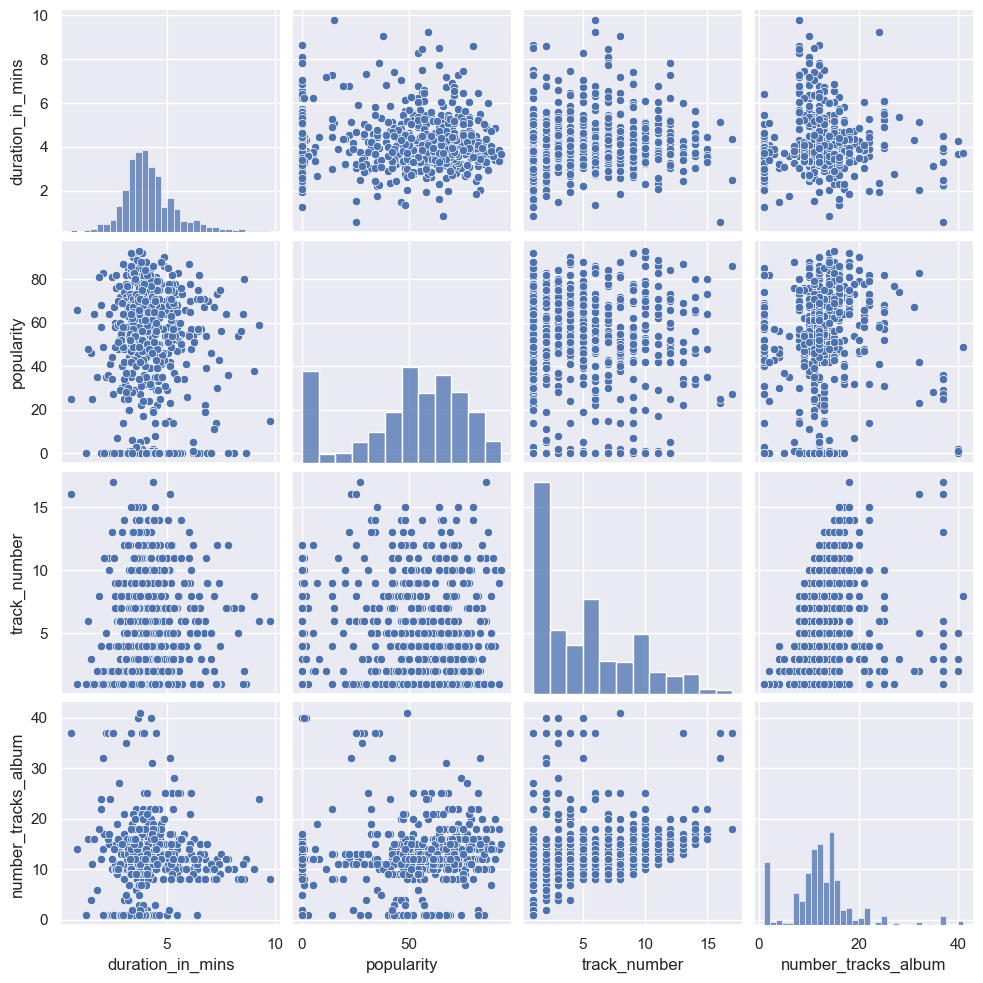

In [19]:
sns.set()
cols = ['duration_in_mins', 'popularity', 'track_number', 'number_tracks_album']
sns.pairplot(df_fil[cols], size = 2.5)
plt.show();

Gracias a la limpieza de datos anterior se puede ver una mejor divicion de los datos, permitiendo encontrar una mayor relacion entre "number_tracks_album" y "track_number", con el resto de variables.

In [20]:
x = df_fil.drop(['explicit'], axis=1)
y = df_fil['explicit']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
comp = []

nums = [1,2,3,4,5,6,7,8,9,10]
tree = ['gini', 'entropy', 'log_loss']

for i in nums:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    comp.append({'Model': 'KNeighbors' ,'Accuracy': metrics.accuracy_score(y_test, y_pred), 'F1 score': metrics.f1_score(y_test, y_pred), 'Var': i})
    
for i in tree:

    clf = DecisionTreeClassifier(criterion = i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    comp.append({'Model': 'DecisionTree', 'Accuracy': metrics.accuracy_score(y_test, y_pred), 'F1 score': metrics.f1_score(y_test, y_pred), 'Var': i})

pd.DataFrame(comp)

,Model,Accuracy,F1 score,Var
0,KNeighbors,0.669492,0.093023,1
1,KNeighbors,0.805085,0.000000,2
2,KNeighbors,0.779661,0.133333,3
3,KNeighbors,0.847458,0.000000,4
4,KNeighbors,0.838983,0.173913,5
5,KNeighbors,0.855932,0.000000,6
6,KNeighbors,0.847458,0.000000,7
7,KNeighbors,0.855932,0.000000,8
8,KNeighbors,0.855932,0.000000,9
9,KNeighbors,0.855932,0.000000,10


In [22]:
final_model = DecisionTreeClassifier(criterion = 'gini')
final_model.fit(X_train,y_train)
tree.plot_tree(final_model)
plt.show()

AttributeError: 'list' object has no attribute 'plot_tree'

Por lo que se ve en la tabla anterior el modelo de "decision tree" con el criterio de "gini" tiene una mayor tasa de aciertos, pero tambien gracias a F1 score se puede concluir que no es modelo realmente confiable, y era de esperarse, puesto que dentro de los datos suministrados no existe mucha informacion acerca de si una cancion es explicita o no.